# Lesson-01-exercise

## 1、根据给定语法模板，自动生成句子

In [1]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

### 1.1 格式化语法模板

In [2]:
# 参数: string:string,split_line行分隔符,split_sen词映射分割符,split_word符号分割符
# 方法: 格式化语法模板, 返回dict(k=string,v=list(string))
def create_grammer(string, split_line='\n', split_sen='=>', split_word='|'):
    grammer_map = {}
    for s in string.split(split_line):
        if s: grammer_map[s.split(split_sen)[0].strip()]=[[i.strip()] for i in s.split(split_sen)[1].strip().split(split_word)]
    return grammer_map

In [3]:
grammer = create_grammer(simple_grammar)
grammer

{'sentence': [['noun_phrase verb_phrase']],
 'noun_phrase': [['Article Adj* noun']],
 'Adj*': [['null'], ['Adj Adj*']],
 'verb_phrase': [['verb noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [4]:
import random

### 1.2 生成句子

In [5]:
# 参数: grammer:dict, target:string
# 方法: 根据语法模板创建句子, 返回string
def create_sentence(grammer, target='sentence'):
    s = ''
    if target == 'null': return s
    if target not in grammer: return target
    for i in random.choice(grammer[target])[0].split(' '):
        s += create_sentence(grammer,i)
    return s

In [6]:
create_sentence(grammer)

'一个小猫看着这个篮球'

In [7]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""

#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [8]:
grammer_human = create_grammer(human, split_line='\n', split_sen='=', split_word='|')
for _ in range(10):
    print(create_sentence(grammer_human,target='human'))

我想找点玩的
我们想找点玩的
我们想找点玩的
我找找乐子
俺找找玩的
我找找玩的
我们找找玩的
俺想找点玩的
俺想找点乐子
我想找点玩的


In [9]:
grammer_host = create_grammer(host, split_line='\n', split_sen='=', split_word='|')
for _ in range(10):
    print(create_sentence(grammer_host,target='host'))

您好我是4号,请问你要喝酒吗？
先生,你好我是62号,您需要赌博吗？
你好我是38号,您需要赌博吗？
你好我是6号,您需要打牌吗？
先生,你好我是7号,您需要喝酒吗？
您好我是1号,请问你要喝酒吗？
先生,你好我是637号,请问你要喝酒吗？
您好我是29号,请问你要喝酒吗？
小朋友,您好我是37号,请问你要赌博吗？
女士,您好我是4556号,您需要喝酒吗？


## 2、Language Model

$ language\_model(String) = Probability(String) \in (0, 1) $

In [10]:
import pandas as pd

In [11]:
# 读取数据
contents = pd.read_csv('/Users/yuanjin/PycharmProjects/nlp_data_set/datasource/sqlResult_1558435.csv', 
                       encoding='gb18030')

In [12]:
# 查看前3条数据
contents.head(3)

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm


#### 步骤：
    1、读取数据，并提取每条数据的content
    2、去除每篇文章的特殊字符
    3、利用jieba分词，并统计每个词出现的次数
    4、计算

In [13]:
article_content_list = contents['content'].tolist()

In [14]:
len(article_content_list)

89611

In [15]:
# 正则去掉特殊字符
import re
def delete_special_symbol(s):
    return re.findall('\w+', str(s))

In [16]:
all_list = [''.join(delete_special_symbol(a)) for a in article_content_list]

In [17]:
import jieba
def cut(s):
    return list(jieba.cut(s))

In [18]:
# 把每一篇文章进行分词为list，并合并所有为1个列表
def get_all_token(all_list):
    token = []
    for ele in all_list:
        token += cut(ele)
    return token

In [19]:
all_token = get_all_token(all_list)
len(all_token)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/dp/9d1tlc2926x2djj4c05f3325ps5m7_/T/jieba.cache
Loading model cost 0.783 seconds.
Prefix dict has been built succesfully.


17528643

In [20]:
from collections import Counter
words_count = Counter(all_token)

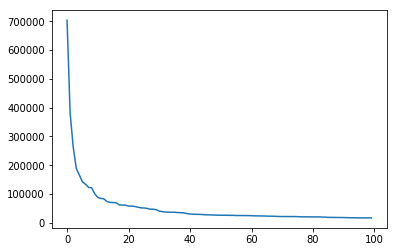

In [21]:
# 查看前10个高频单次出现的情况
import matplotlib.pyplot as plt
%matplotlib inline
frq = [v for k, v in words_count.most_common(100)]
x_lines = [i for i in range(100)]
plt.plot(x_lines,frq)

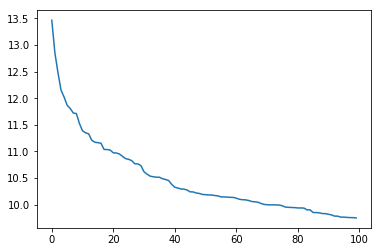

In [22]:
import numpy as np
plt.plot(x_lines,np.log(frq))

In [23]:
# 某一个词语出现的概率
def get_prob_one(word):
    return words_count[word] / len(all_token)

In [24]:
# 前后两个词之间组成的token
def get_all_token_two(all_token):
    return [all_token[i]+all_token[i+1] for i in range(len(all_token)-1)]

In [25]:
# 前后两个词语出现的概率
def get_prob_two(word_1,word_2):
    token_two = get_all_token_two(all_token)
    words_count_two = Counter(token_two)
    if word_1+word_2 in words_count_two:
        return words_count_two[word_1+word_2] / len(token_two)
    else:
        return 1 / len(token_two)

In [26]:
get_prob_one('我们')

0.0011399627455473877

In [27]:
get_prob_two('我们', '在')

3.069262296531585e-05

In [28]:
# 某一个句子出现的概率
def get_prob_sentence(sentence):
    words = cut(sentence)
    sentence_prob = 1
    for i in range(len(words)-1):
        next_word = words[i+1]
        p2 = get_prob_two(words[i],next_word)
        sentence_prob *= p2
    return sentence_prob

In [29]:
get_prob_sentence('小明今天抽奖抽到一台苹果手机')

1.551396782803185e-42

In [30]:
get_prob_sentence('小明今天抽奖抽到一架波音飞机')

1.1583762644930448e-41

In [31]:
get_prob_sentence('我早上吃了早饭就去上班')

2.2086414997887665e-45

In [32]:
get_prob_sentence('我早上吃了晚饭就去上班')

7.362138332629222e-46

In [33]:
for _ in range(5):
    sentence_i = create_sentence(grammer)
    sentence_p = get_prob_sentence(sentence_i)
    print(sentence_i + ': ',sentence_p)


一个蓝色的蓝色的蓝色的小小的蓝色的好看的桌子看着一个小小的好看的蓝色的蓝色的篮球:  6.807084191533364e-135
这个小小的小猫看着一个篮球:  5.438775761141758e-36
这个好看的女人看着这个桌子:  4.865180310870789e-40
一个桌子听着这个蓝色的蓝色的小猫:  8.349958938923512e-56
这个小小的蓝色的桌子看着一个好看的好看的小猫:  1.3824326399137e-71
